# Linear Regression Algorithm - Sklearn vs OLS and Gradaient Decent from Scratch using Python 
1. Loading Required Libraries and Dataset
    - Working with Diabetes dataset
    - Spliting the dataset
2. Using Sklearn Linear Regression
    - fit and predict the y_test
    - get the cofficent and Intercept
    - Calculate r2 score
2. Using OLS Approch for Linear Regression
    - About OLS
    - Hand written Notes of OLS derivation
    - fit and predict for y_test
    - get the cofficent and Intercept
    - Calculate r2 score
3. Creating own linear Regression Module with Gradient Decent
    - What is gradient decent?
    - Hand Written notes for Linear Regression's Gradient Decent
    - fit and predict the y_test
    - get the cofficent and Intercept
    - Calculate r2 score
4. Conclusion
  

What is  Linear Regression?
When to use?
Merit demerit
hand written notes

ols vs GD from scratch

# Loading the reqired Libraries and Datasets


In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

Loading the Diabetes Dataset to work on Linear Programming

In [2]:
X,y = load_diabetes(return_X_y = True)

Splitting the dataset to train and test dataset.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=7) 

# Training and Testing Model using Linear Regression SkLearn


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.5028341353051262

In [6]:
print(f"Cofficients: {reg.coef_}")
print('___________')
print(f"Intercept: {reg.intercept_}")

Cofficients: [ -64.48075237 -258.05136757  522.4594678   354.2541163  -950.90042887
  649.25752012  111.90804263   83.50673556  865.53995117   41.26789738]
___________
Intercept: 152.47077064074273


# Creating own Linear Regression from Scratch

## OLS

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS. 


Advantage of OLS:
* Despite the simplicity
* efficiency
* interpretability 
* flexibility
* scalability of OLS

Disadvantage of OLS:
* sensitivity to outliers
* heavy reliance on observed data
* limitation in dealing with complex
* nonlinear relationships between variables.



#### Hand written notes of OLS

https://munabhusal.medium.com/ols-handwritten-notes-d7dff6402066
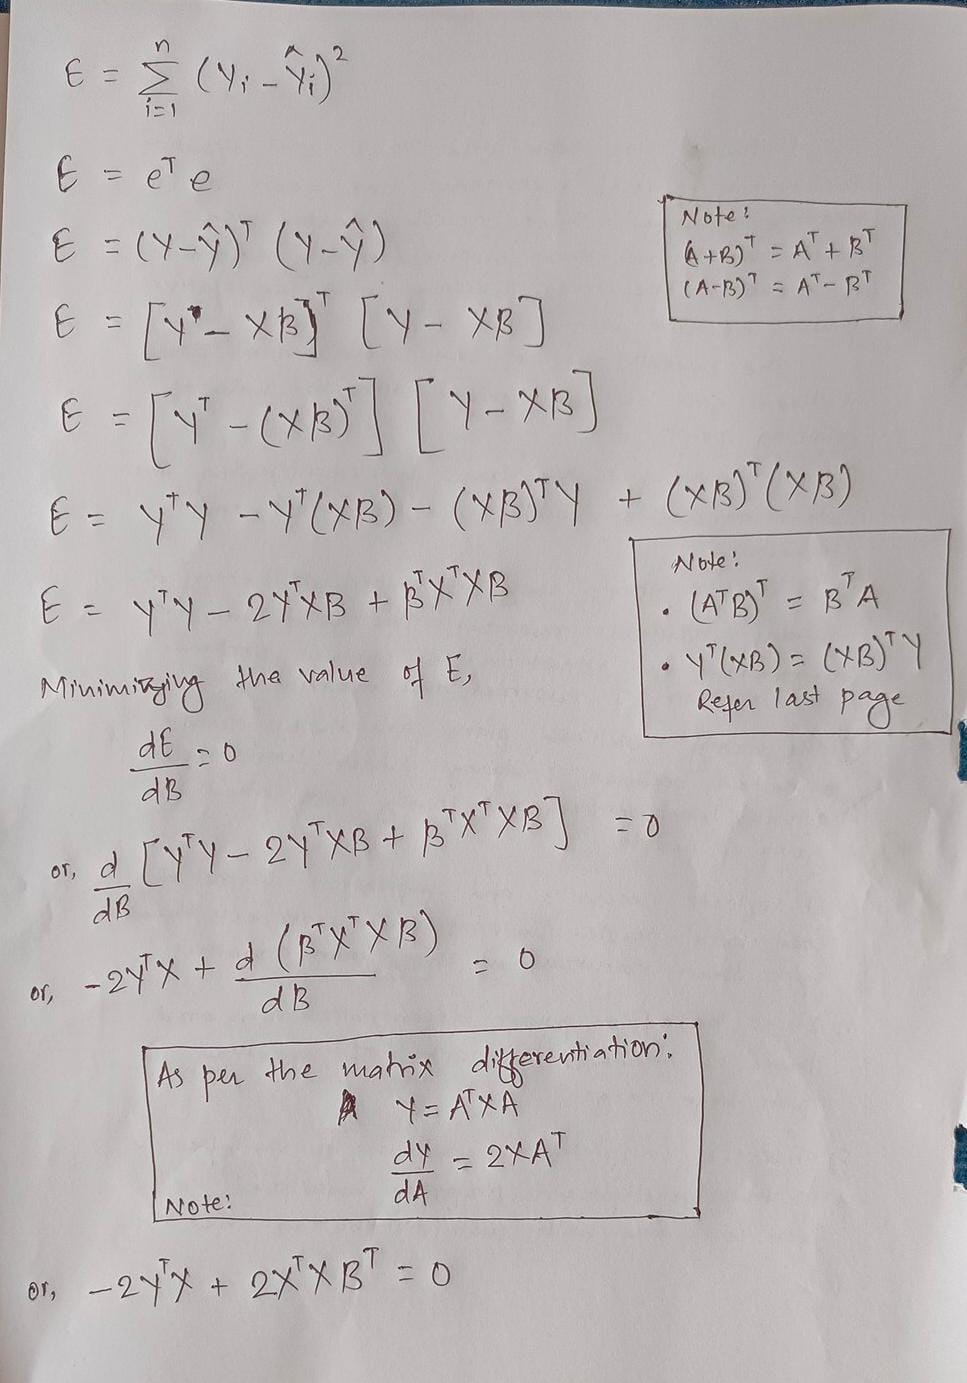
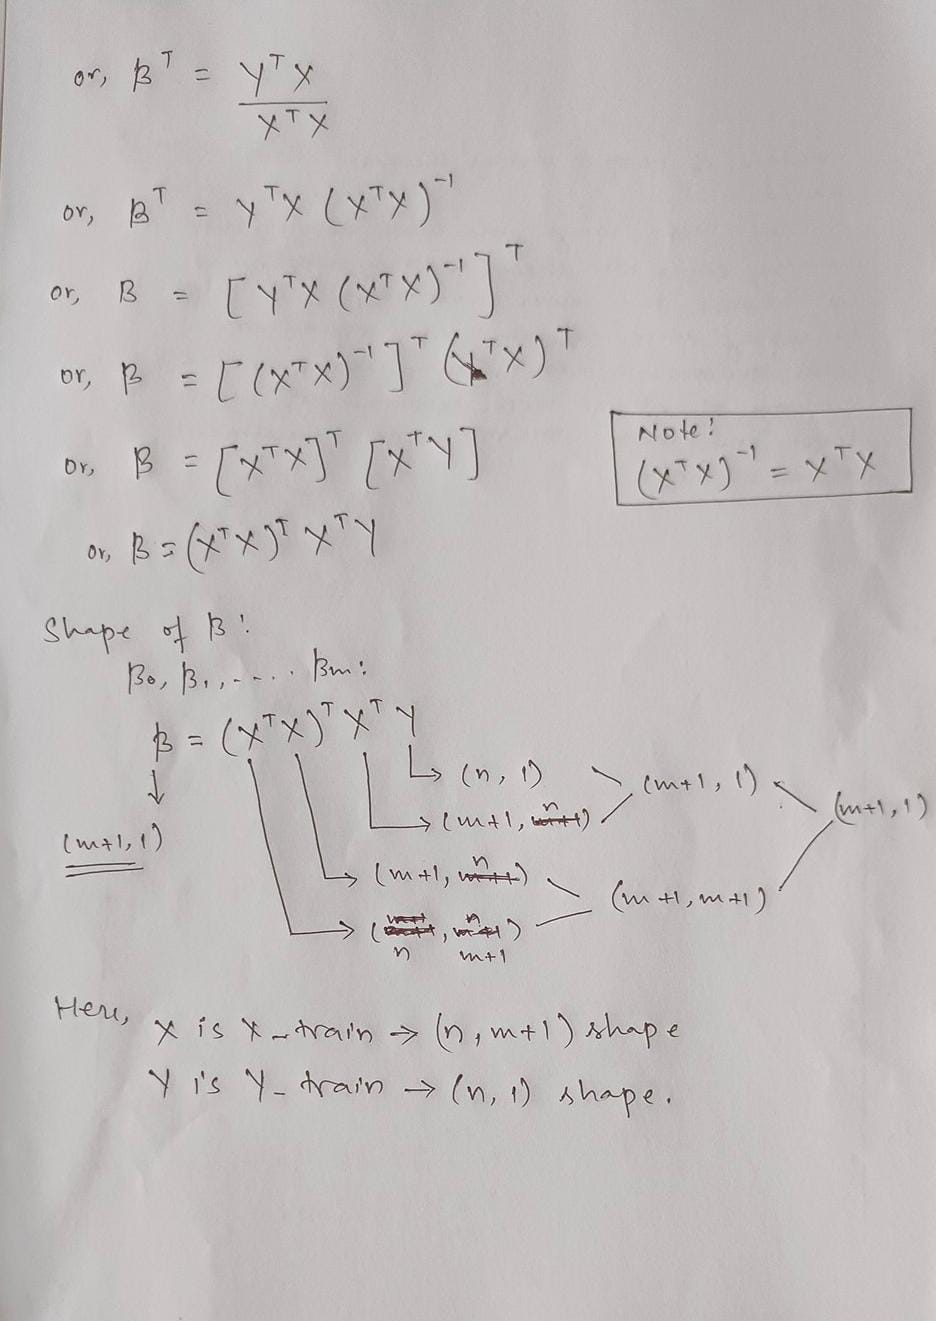
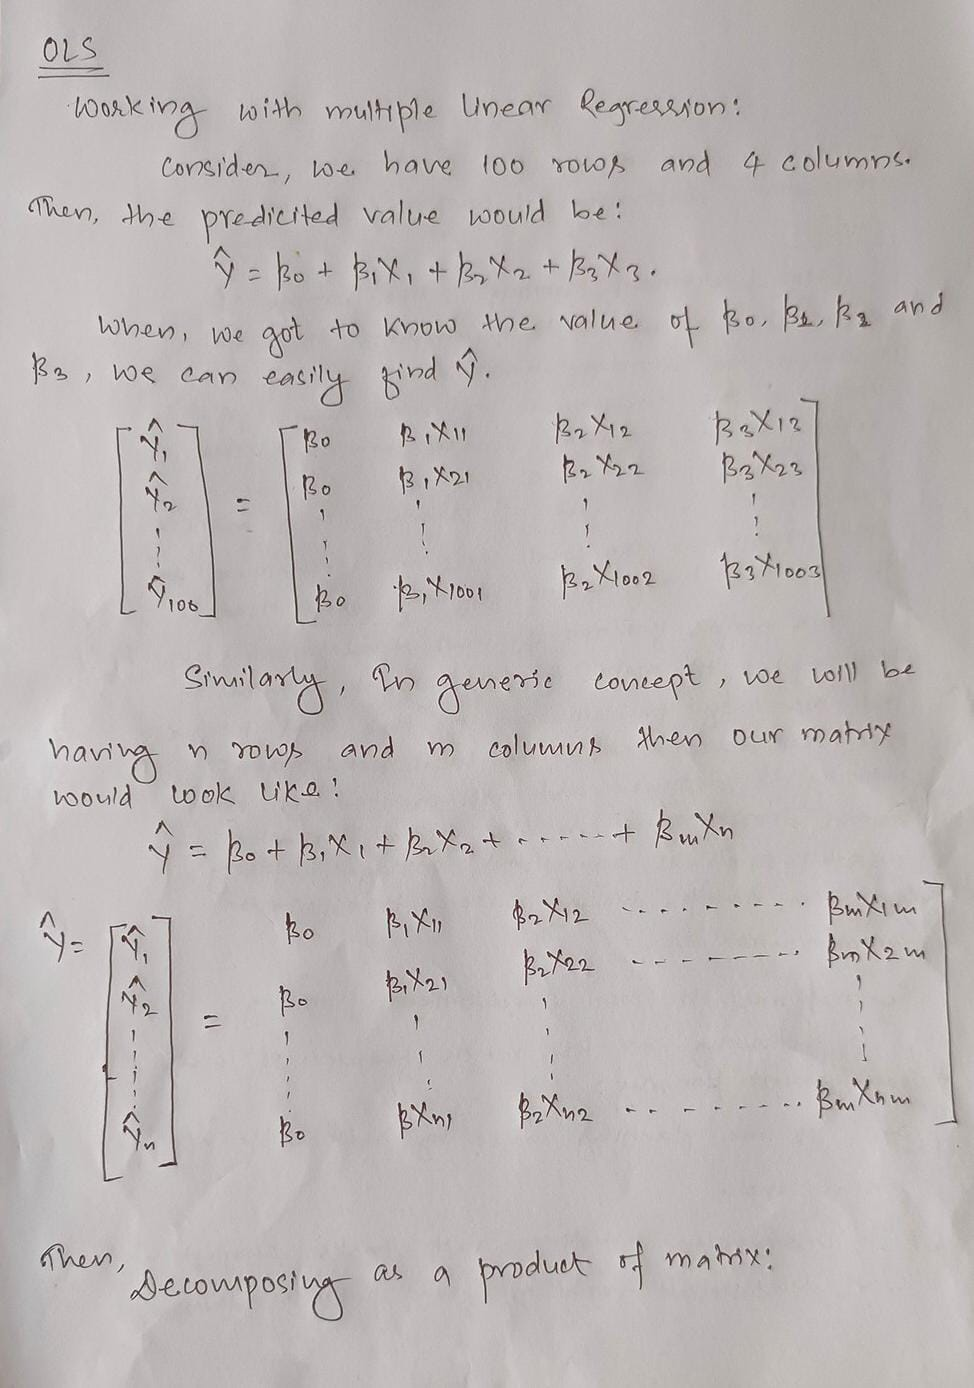
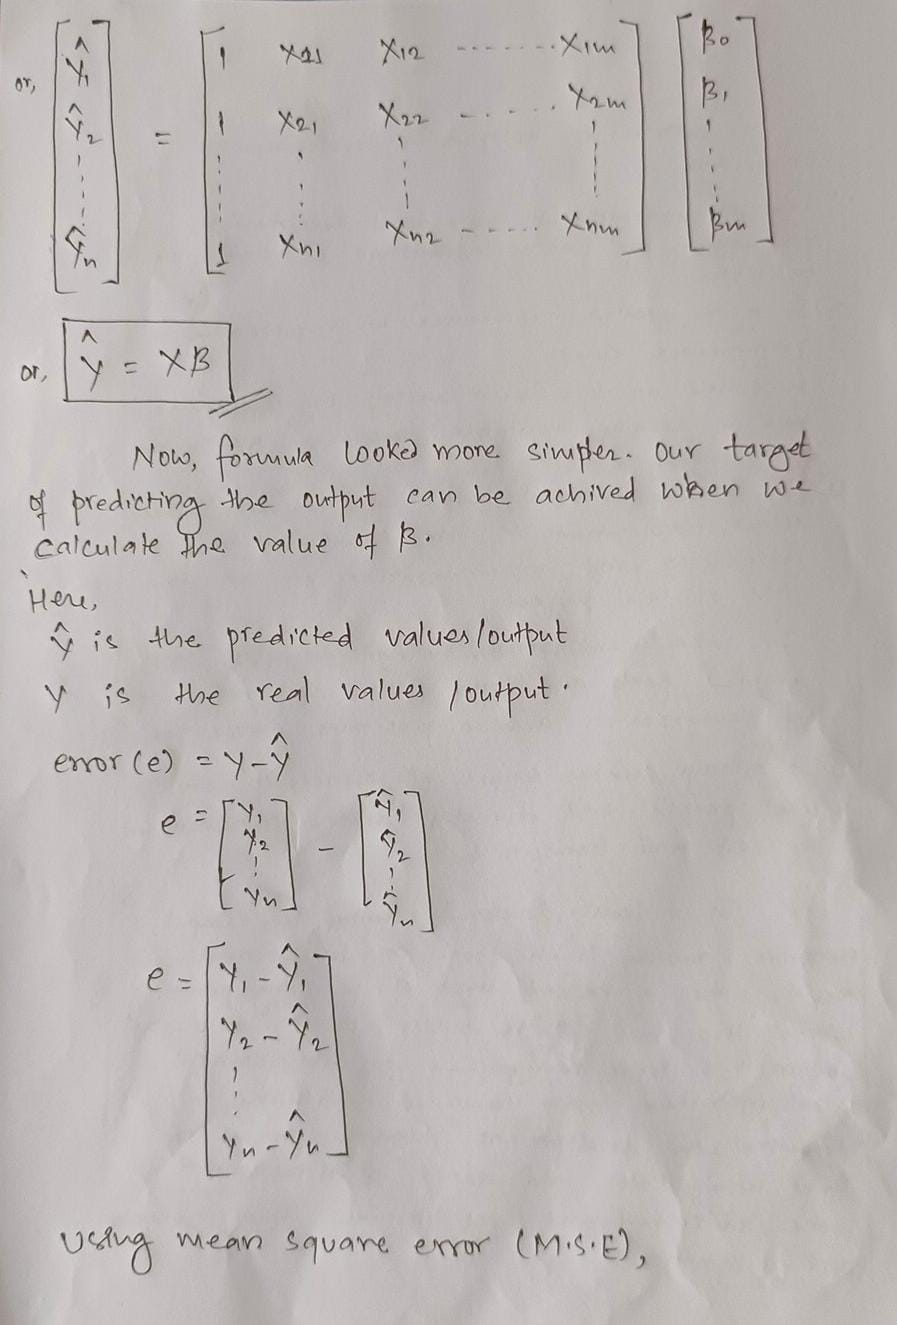
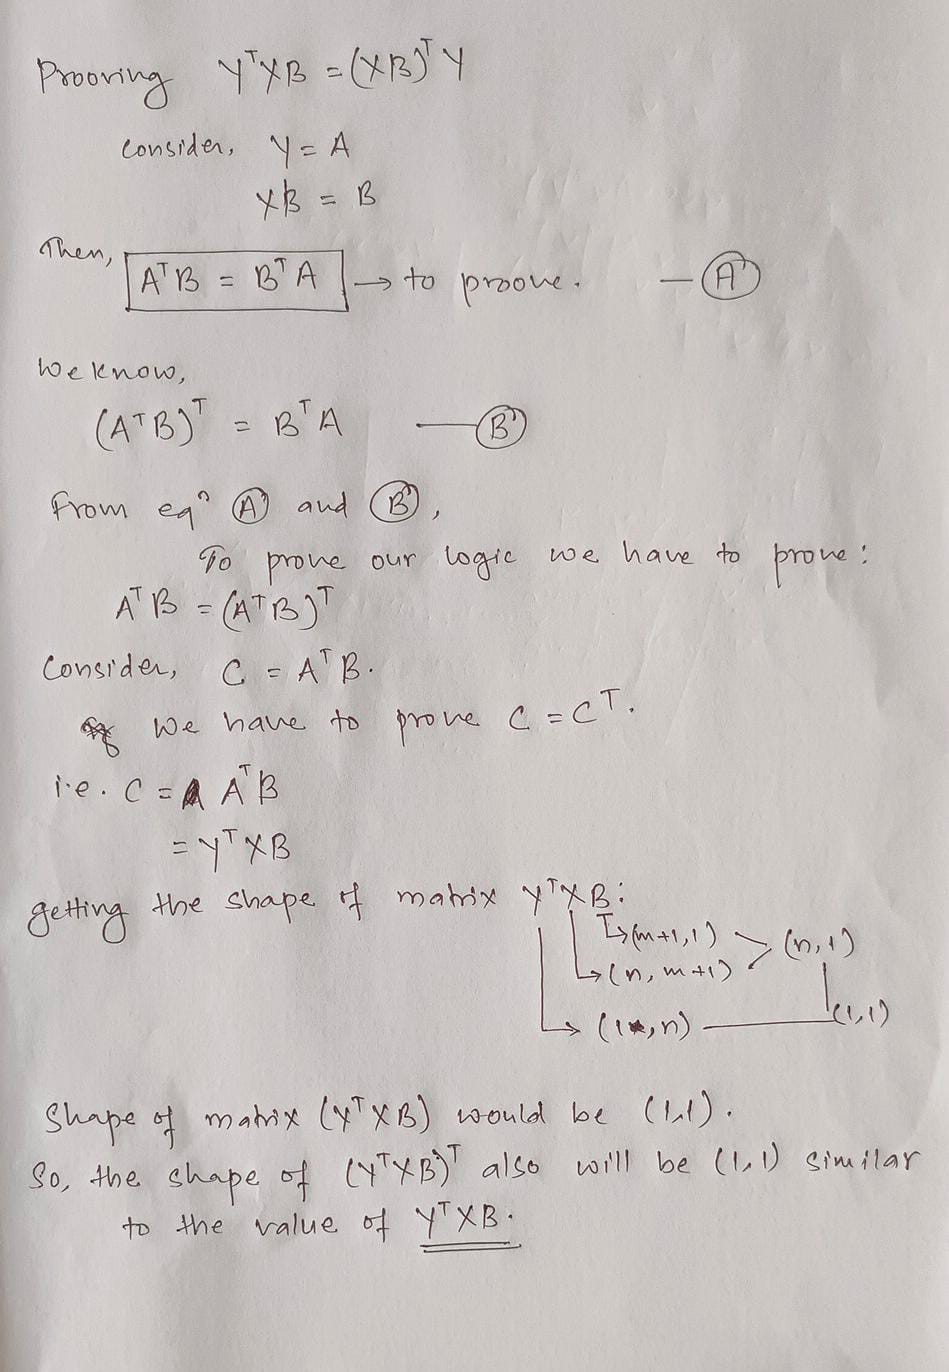

#### OLS coding from scratch

In [7]:
class OLS_Li_Reg:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        # inserting 1 in the first column
        X_train = np.insert(X_train,0,1,axis = 1)
        
        #calc the coff
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
        
    
    def predict(self, X_test):
        y_pred = np.dot(X_test,self.coef_)+self.intercept_
        return y_pred
    

In [8]:
lr = OLS_Li_Reg()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.502834135305126

In [9]:
print(f"Cofficients: {lr.coef_}")
print('___________')
print(f"Intercept: {lr.intercept_}")

Cofficients: [ -64.48075237 -258.05136757  522.4594678   354.2541163  -950.90042887
  649.25752012  111.90804263   83.50673556  865.53995117   41.26789738]
___________
Intercept: 152.47077064074276


# Batch Gradient Decent

#### Defination:

Gradient descent is a popular optimization algorithm used in machine learning and deep learning to minimize a function by iteratively moving in the direction of steepest descent of the function. Here are some advantages and disadvantages of gradient descent:

Advantages:
1. Efficiency: Gradient descent is computationally efficient and can handle large amounts of data efficiently.
2. Flexibility: It can be applied to a wide range of optimization problems, including convex and non-convex optimization.
3. Scalability: Gradient descent can be easily scaled to work with high-dimensional data and complex models.
4. Ease of Implementation: The algorithm is relatively easy to implement and is widely supported in various machine learning libraries.
5. Global Convergence: With appropriate learning rate settings, gradient descent is guaranteed to converge to a local minimum, and in some cases, a global minimum.

Disadvantages:
1. Sensitivity to Learning Rate: The choice of learning rate is crucial in gradient descent. If the learning rate is too high, the algorithm may overshoot the minimum, and if it is too low, convergence may be slow.
2. Local Minima: Gradient descent can get stuck in local minima in non-convex optimization problems, leading to suboptimal solutions.
3. Saddle Points: In high-dimensional spaces, gradient descent can get stuck at saddle points, which are flat regions that are not local minima but can slow down convergence.
4. Initialization Sensitivity: The performance of gradient descent can be sensitive to the initial starting point, which may require multiple runs with different initializations.
5. Requires Differentiable Functions: Gradient descent requires the function to be differentiable, which limits its applicability to functions that are smooth and continuous.

Overall, gradient descent is a powerful optimization algorithm with several advantages, but it also has limitations that need to be considered when applying it to optimization problems. Variants of gradient descent, such as stochastic gradient descent and Adam, have been developed to address some of these limitations and improve the efficiency and convergence properties of the algorithm.

#### Hand written Notes:

https://munabhusal.medium.com/derivation-of-gradient-decent-for-linear-b879a847ba90

#### Coding from Scratch

In [10]:
class BatchGDRegressor:
    def __init__(self, learning_rate = 0.01, epochs = 100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):
        # Init coficent
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(X_train, self.coef_)+self.intercept_
            
            # Updating Intercept
            intercept_derivation = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr* intercept_derivation)
        
            # Updating Cofficeint:
            cofficent_derivation = -2 * np.dot((y_train - y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr* cofficent_derivation)
        print(self.coef_)
        print('___________')
        print(self.intercept_)
        print('___________')
            
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [11]:
obj = BatchGDRegressor(learning_rate=0.01, epochs=16000)

obj.fit(X_train, y_train)
y_pred = obj.predict(X_test)
r2_score(y_test, y_pred)

[  24.95361636  -83.31026239  327.93868565  232.94548087   21.07257092
  -23.15950259 -169.89973514  130.49466803  301.23681757  124.9177994 ]
___________
152.47246747301503
___________


0.5032626851826805

In [12]:
print(f"Cofficients: {obj.coef_}")
print('___________')
print(f"Intercept: {obj.intercept_}")

Cofficients: [  24.95361636  -83.31026239  327.93868565  232.94548087   21.07257092
  -23.15950259 -169.89973514  130.49466803  301.23681757  124.9177994 ]
___________
Intercept: 152.47246747301503


# Conclusion

We can see that after the training for certain epoches, Gradint Decent Approch also resulted to almost equal r2 score as of OLS and sklearn .